<a href="https://colab.research.google.com/github/farazkhanfk7/TensorFlow-Keras/blob/master/Image_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image

In [15]:
image.LOAD_TRUNCATED_IMAGES = True 
model = VGG16(weights='imagenet', include_top=False)

In [30]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [8]:
y_test[0]

array([3], dtype=uint8)

In [16]:
len(x_train)

50000

In [ ]:
featurelist = []
for i in range(50000):
  img = x_train[i]
  img = img.reshape(1,32,32,3)
  img = img.astype('float32')
  img = img/255.0
  features = np.array(model.predict(img))
  featurelist.append(features.flatten())
  print(f'Training at step: {i+1}')

In [ ]:
featurelist

In [22]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(np.array(featurelist))

In [24]:
labels = kmeans.labels_
print(labels)

[1 5 3 ... 4 4 6]


In [33]:
labels[0]

1

In [31]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

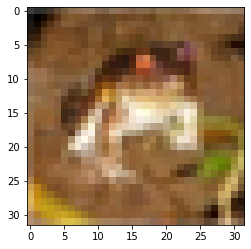

In [32]:
%matplotlib inline
plt.imshow(x_train[0])

In [40]:
import pandas as pd
df = pd.DataFrame(data=labels,index=None,columns=['class'])

In [41]:
df.head()

,class
0,1
1,5
2,3
3,7
4,0


In [50]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [48]:
df["class"].value_counts()

4    6259
9    6002
3    5532
5    5287
0    5085
6    5033
2    4635
1    4387
7    4072
8    3708
Name: class, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


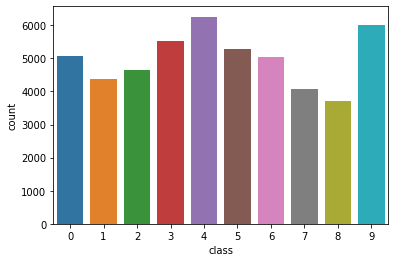

In [49]:
import seaborn as sns
sns.countplot(df["class"])